In [19]:
import os
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.models import Sequential

In [2]:
labels_df = pd.read_csv('labels.csv')

In [3]:
data_dir = '/content/drive/MyDrive/traffic_Data/DATA'
images = []
labels = []

In [4]:
for class_folder in os.listdir(data_dir):
    class_id = int(class_folder)
    class_path = os.path.join(data_dir, class_folder)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)

        class_name = labels_df.loc[labels_df['ClassId'] == class_id, 'Name'].iloc[0]
        labels.append(class_name)

In [5]:
resized_images = []


In [6]:
resized_images = []
for img in images:
    resized_img = cv2.resize(img, (224, 224))
    resized_images.append(resized_img)

In [7]:
images = np.array(resized_images)
labels = np.array(labels)

In [8]:
unique_labels, label_counts = np.unique(labels, return_counts=True)
max_count = np.max(label_counts)

In [9]:
print(images.shape , labels.shape)

(4170, 224, 224, 3) (4170,)


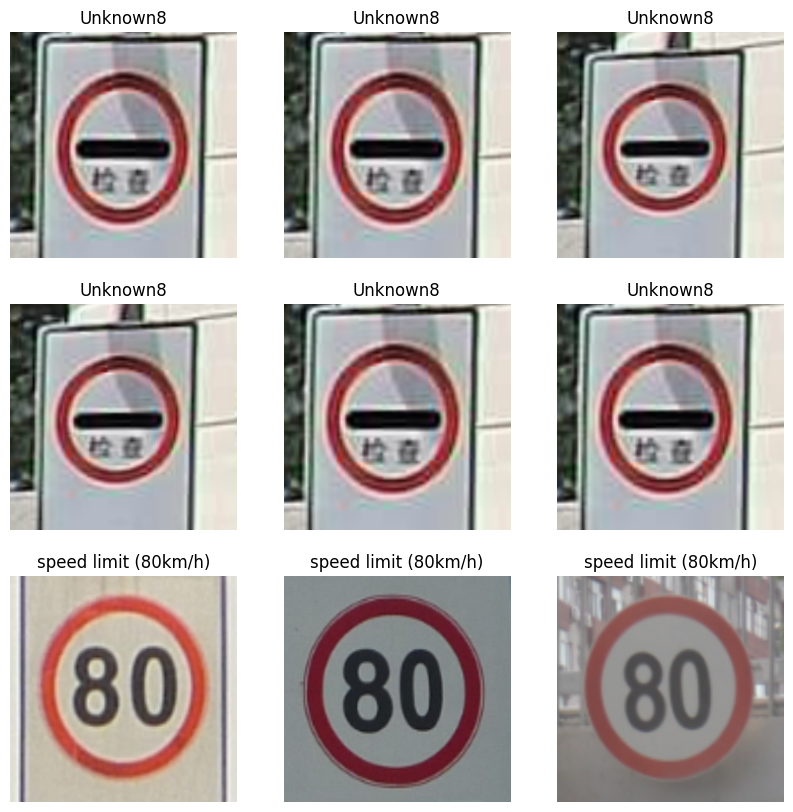

In [10]:
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(labels[i])
    plt.axis('off')
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [17]:
def custom_cnn(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(inputs, outputs)
    return model

In [20]:
input_shape = (224, 224, 3)
num_classes = len(label_encoder.classes_)
cnn_model = custom_cnn(input_shape, num_classes)

In [21]:
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
checkpoint_callback = ModelCheckpoint(
    filepath='custom_cnn_model_weights.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [24]:
history = cnn_model.fit(X_train, y_train_encoded,
                         epochs=10,
                         batch_size=32,
                         validation_data=(X_test, y_test_encoded),
                         callbacks=[checkpoint_callback])


test_loss, test_acc = cnn_model.evaluate(X_test, y_test_encoded)
print("Test Accuracy:", test_acc)

Epoch 1/10
105/105 [==============================] - 494s 5s/step - loss: 2.5011 - accuracy: 0.7068 - val_loss: 0.6812 - val_accuracy: 0.8153
Epoch 2/10
105/105 [==============================] - 492s 5s/step - loss: 0.2487 - accuracy: 0.9376 - val_loss: 0.2735 - val_accuracy: 0.9341
Epoch 3/10
105/105 [==============================] - 500s 5s/step - loss: 0.0950 - accuracy: 0.9790 - val_loss: 0.2707 - val_accuracy: 0.9376
Epoch 4/10
105/105 [==============================] - 490s 5s/step - loss: 0.1708 - accuracy: 0.9610 - val_loss: 0.3963 - val_accuracy: 0.9197
Epoch 5/10
105/105 [==============================] - 473s 5s/step - loss: 0.0868 - accuracy: 0.9811 - val_loss: 0.3668 - val_accuracy: 0.9448
Epoch 6/10
105/105 [==============================] - 483s 5s/step - loss: 0.0654 - accuracy: 0.9880 - val_loss: 0.4886 - val_accuracy: 0.9173
Epoch 7/10
105/105 [==============================] - 482s 5s/step - loss: 0.0597 - accuracy: 0.9865 - val_loss: 0.3833 - val_accuracy: 0.9520

In [27]:
num_rows = max(num_features // 8, 1)



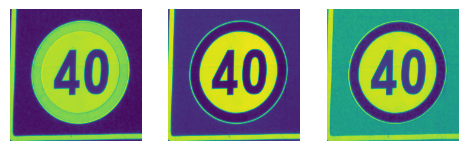

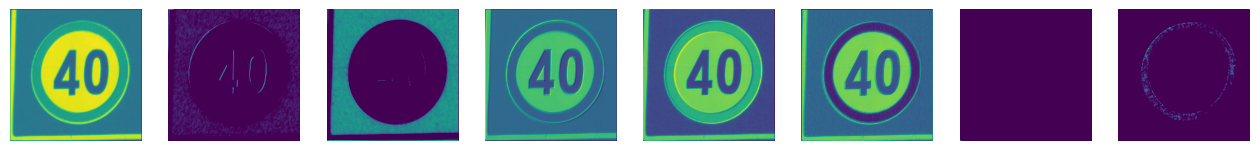

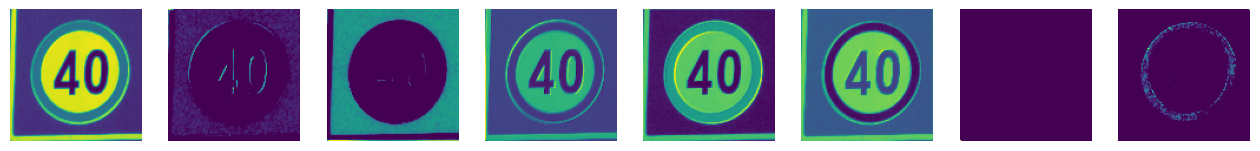

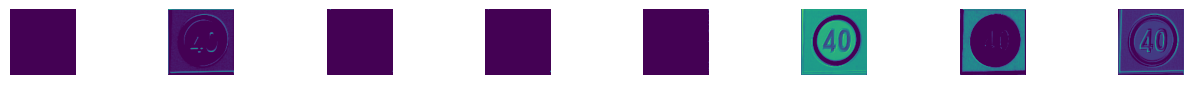

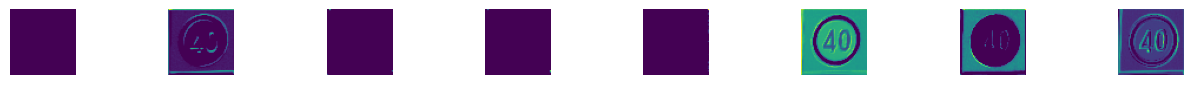

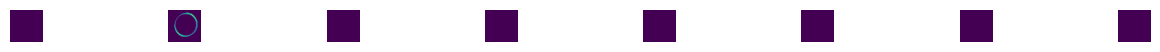

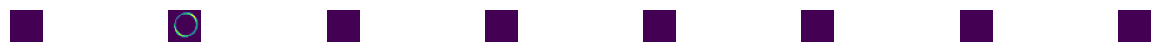

IndexError: too many indices for array: array is 2-dimensional, but 4 were indexed

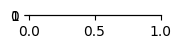

In [31]:
for layer_activation in layer_activations:
    num_features = layer_activation.shape[-1]  # Number of features in the layer
    num_rows = max(num_features // 8, 1)  # Number of rows in the subplot grid
    plt.figure(figsize=(16, 8))
    for i in range(min(num_features, 8)):  # Limit to 8 features per layer for visualization
        plt.subplot(num_rows, 8, i+1)
        plt.imshow(layer_activation[0, :, :, i], cmap='viridis')
        plt.axis('off')
    plt.show()

27/27 [==============================] - 52s 2s/step
Classification Report:
                              precision    recall  f1-score   support

           Bicycles crossing       1.00      1.00      1.00        44
           Children crossing       0.85      1.00      0.92        11
                Danger Ahead       0.60      0.60      0.60         5
 Dangerous curve to the left       0.64      1.00      0.78         7
Dangerous curve to the right       1.00      0.64      0.78        11
                Dont Go Left       1.00      1.00      1.00        18
       Dont Go Left or Right       1.00      1.00      1.00        14
               Dont Go Right       0.71      1.00      0.83         5
            Dont Go straight       1.00      1.00      1.00        17
    Dont Go straight or left       1.00      1.00      1.00         3
     Dont overtake from Left       1.00      1.00      1.00        22
                      Fences       1.00      1.00      1.00        16
             

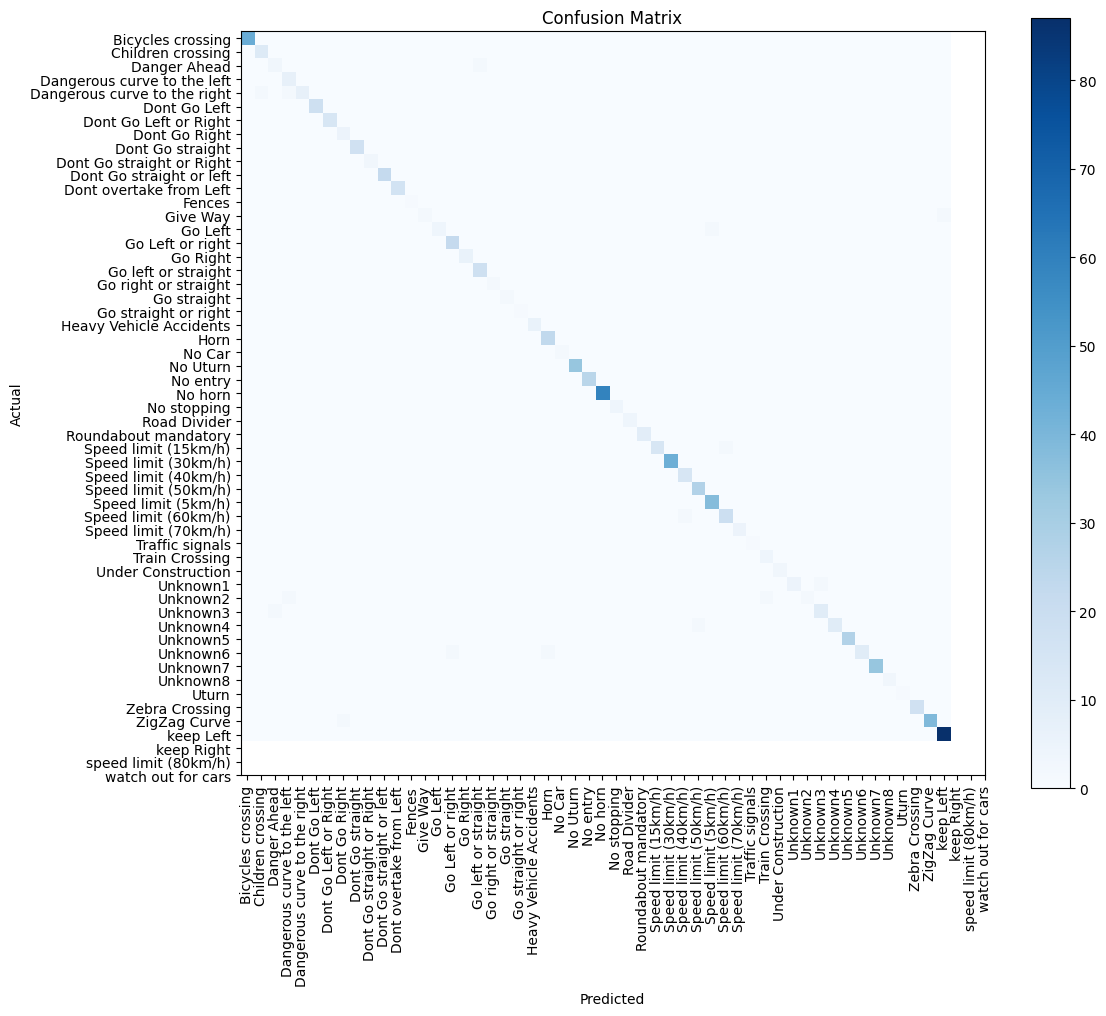

In [34]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


y_test_original = label_encoder.inverse_transform(y_test_encoded)
y_pred_original = label_encoder.inverse_transform(y_pred_classes)
print("Classification Report:")
print(classification_report(y_test_original, y_pred_original))


conf_matrix = confusion_matrix(y_test_original, y_pred_original)
plt.figure(figsize=(12, 10))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_, rotation=90)
plt.yticks(np.arange(len(label_encoder.classes_)), label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()